
#### Training a model using sepal length as feature and sepal width as the label 

In [236]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()

In [179]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [192]:
X = np.array(iris.data[:,0]) ## Taking first column (sepal length) as a feature 
y = np.array(iris.data[:,1]) ## Taking second coloumn (sepal width) as a label

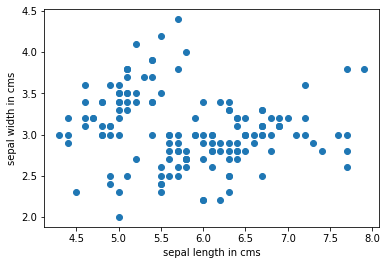

In [200]:
plt.scatter(X,y)
plt.xlabel("sepal length in cms")
plt.ylabel("sepal width in cms")

plt.show()
plt.show()

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 5, shuffle = True)

In [198]:
X_train.shape

(135,)

### Training the model using stochastic gradient descent regressor

In [202]:
from sklearn.linear_model import SGDRegressor


In [210]:
## pipeline, fit 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

max_iter = np.ceil(10**6/ X_train.shape[0])

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=max_iter, tol=1e-3))

reg.fit(X_train.reshape(-1,1), y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=7408.0))])

In [235]:
## predict, score 

import sklearn.metrics as metrics

y_pred = reg.predict(X_test.reshape(-1,1))

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
root_mean_squared_error = metrics.mean_squared_error(y_test, y_pred, squared = False)

print("(L1 loss) mean_abs_error : ",mean_abs_error.round(2))   
print("(L2 loss) mean_squared_error : ",mean_squared_error.round(2))
print("root_mean_squared_error : ",root_mean_squared_error.round(2))

(L1 loss) mean_abs_error :  0.39
(L2 loss) mean_squared_error :  0.21
root_mean_squared_error :  0.46
